<a href="https://colab.research.google.com/github/pradosh2024/langgraph_playground/blob/main/004_conditional_edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise for Router and Conditional Edges  🛹

### Your task:

Make the graph on the right! You will need to **make use of 2 conditional edges!**

**Input:** `initial_state = AgentState(number1 = 10, operation = "-", number2 = 5, number3 = 7, number4 = 2, operation2 = "+", finalNumber = 0, finalNumber2 = 0)`

---


**Graph Structure:**

* `__start__` node
* Connects to `router`
* `router` has two conditional edges leading to:
    * `addition_operation`
    * `subtraction_operation`
* `addition_operation` connects to `add_node`
* `subtraction_operation` connects to `subtract_node`
* Both `add_node` and `subtract_node` connect to `router2`
* `router2` has two conditional edges leading to:
    * `addition_operation2`
    * `subtraction_operation2`
* `addition_operation2` connects to `add_node2`
* `subtraction_operation2` connects to `subtract_node2`

In [2]:
%pip install langgraph --quiet

from typing import  List,TypedDict
from langgraph.graph import StateGraph,START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    number3: int
    number4: int
    operation2: str
    finalNumber: int
    finalNumber2: int

In [17]:
def adder1(state: AgentState) -> AgentState:
  state["finalNumber"] = state["number1"] + state["number2"]
  return state

def subtracter1(state: AgentState) -> AgentState:
  state["finalNumber"] = state["number1"] - state["number2"]
  return state

def adder2(state: AgentState) -> AgentState:
  state["finalNumber2"] = state["number3"] + state["number4"]
  return state

def subtracter2(state: AgentState) -> AgentState:
  state["finalNumber2"] = state["number3"] - state["number4"]
  return state

In [37]:
def decide_next_node1(state: AgentState) -> str:

  """This node will select the next node of the first stage in the graph"""
  if state["operation"] ==  "+":
    return "add_operation1"
  elif state["operation"] ==  "-":
    return "subtract_operation1"


def decide_next_node2(state: AgentState) -> str:

  """This node will select the next node of the second stage in the graph"""
  if state["operation2"] ==  "+":
    return "add_operation2"
  elif state["operation2"] ==  "-":
    return "subtract_operation2"

In [38]:
graph = StateGraph(AgentState)

graph.add_node("addition_operation1", adder1)
graph.add_node("subtraction_operation1", subtracter1)

graph.add_node("addition_operation2", adder2)
graph.add_node("subtraction_operation2", subtracter2)

graph.add_node("router1", lambda state:state) # passthrough function
graph.add_node("router2", lambda state:state) # passthrough function


graph.add_edge(START,"router1")

graph.add_conditional_edges("router1",
                         decide_next_node1,

                         {
                             "add_operation1":"addition_operation1",
                             "subtract_operation1":"subtraction_operation1"
                         })


graph.add_edge("addition_operation1", "router2")
graph.add_edge("subtraction_operation1", "router2")

graph.add_conditional_edges("router2",
                         decide_next_node2,

                         {
                             "add_operation2":"addition_operation2",
                             "subtract_operation2":"subtraction_operation2"
                         })

graph.add_edge("addition_operation2", END)
graph.add_edge("subtraction_operation2", END)

app = graph.compile()

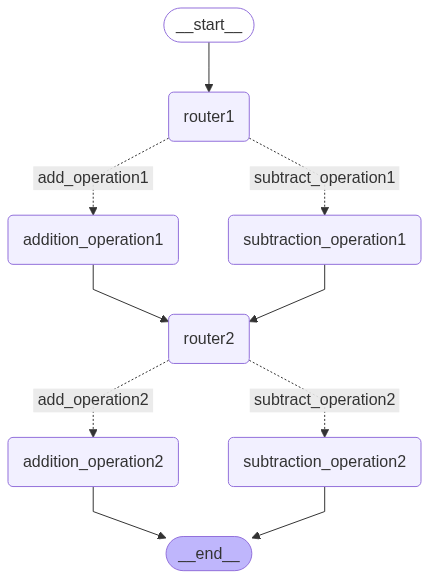

In [39]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [40]:
state = AgentState(number1 = 10, operation = "-", number2 = 5, number3 = 7, number4 = 2, operation2 = "+", finalNumber = 0, finalNumber2 = 0)
app.invoke(state)

{'number1': 10,
 'operation': '-',
 'number2': 5,
 'number3': 7,
 'number4': 2,
 'operation2': '+',
 'finalNumber': 5,
 'finalNumber2': 9}

### Are you confused with the namings?

#### It's a common point of confusion when first working with LangGraph's conditional edges and node naming. It's easy to get lost with strings representing both node names and return values.

Let's clarify by renaming some elements and adding extensive comments.

Key Concepts Explained:

- Node Name (string): This is the unique identifier you give to a node when you add it to the graph using graph.add_node("node_name", some_callable). It's what you use to refer to that specific node in add_edge and add_conditional_edges.

- Callable: This is the actual Python function or object that gets executed when the flow reaches a particular node. In your case, adder1, subtracter1, adder2, subtracter2, and lambda state: state are callables.

- Conditional Edge Function (e.g., decide_next_node1): This function's job is to look at the current state of the graph and return a string. This string must match one of the keys in the mapping dictionary provided to add_conditional_edges.

- Conditional Edge Mapping Dictionary (e.g., { "key_string": "target_node_name" }):
  - Key (string): This is the string that your conditional edge function (decide_next_node1 or decide_next_node2) returns.

  - Value (string): This is the name of the actual node in your graph that the execution should transition to if the key matches.

Analogy:

Imagine a train station (router). You give the conductor (decide_next_node function) instructions based on the train's cargo (state). The conductor then looks at a large departure board (conditional edge mapping dictionary). The board lists destinations (keys) and the track number (value, which is the actual node name) to go to for that destination.

Here's your code rewritten with clearer naming and detailed comments:

In [ ]:
from langgraph.graph import StateGraph, END, START
from typing import TypedDict, List, Dict, Any

# Assume AgentState, adder1, subtracter1, adder2, subtracter2 are defined elsewhere.
# Let's define a basic AgentState and placeholder functions for clarity.

class AgentState(TypedDict):
    """
    Represents the state of our graph.
    This will be passed between nodes.
    """
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str  # Operation for the first stage (e.g., "+", "-")
    operation2: str # Operation for the second stage (e.g., "+", "-")
    finalNumber: int # Result of the first operation
    finalNumber2: int # Result of the second operation

# Placeholder functions for the actual operations
def adder1(state: AgentState) -> AgentState:
    print(f"Executing adder1 with {state['number1']} and {state['number2']}")
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtracter1(state: AgentState) -> AgentState:
    print(f"Executing subtracter1 with {state['number1']} and {state['number2']}")
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def adder2(state: AgentState) -> AgentState:
    print(f"Executing adder2 with {state['finalNumber']} and {state['number3']}")
    state["finalNumber2"] = state["finalNumber"] + state["number3"]
    return state

def subtracter2(state: AgentState) -> AgentState:
    print(f"Executing subtracter2 with {state['finalNumber']} and {state['number3']}")
    state["finalNumber2"] = state["finalNumber"] - state["number3"]
    return state

# --- Conditional Edge Functions (Decision Makers) ---

def decide_first_stage_operation(state: AgentState) -> str:
    """
    This function acts as the 'decision maker' for the first stage.
    It inspects the 'operation' field in the state and returns a string
    that will match one of the keys in the conditional_edges mapping.
    """
    print(f"Router 1: Deciding next node based on operation: {state['operation']}")
    if state["operation"] == "+":
        # The string "perform_addition_first_stage" is a KEY in the mapping.
        # It DOES NOT need to be the actual node name, but it *must* be in the keys.
        return "perform_addition_first_stage"
    elif state["operation"] == "-":
        # The string "perform_subtraction_first_stage" is a KEY in the mapping.
        return "perform_subtraction_first_stage"
    else:
        raise ValueError("Invalid operation for first stage")


def decide_second_stage_operation(state: AgentState) -> str:
    """
    This function acts as the 'decision maker' for the second stage.
    It inspects the 'operation2' field in the state and returns a string
    that will match one of the keys in the conditional_edges mapping.
    """
    print(f"Router 2: Deciding next node based on operation2: {state['operation2']}")
    if state["operation2"] == "+":
        # The string "perform_addition_second_stage" is a KEY in the mapping.
        return "perform_addition_second_stage"
    elif state["operation2"] == "-":
        # The string "perform_subtraction_second_stage" is a KEY in the mapping.
        return "perform_subtraction_second_stage"
    else:
        raise ValueError("Invalid operation for second stage")

# --- Graph Definition ---

# Initialize the StateGraph with our defined AgentState
graph = StateGraph(AgentState)

# --- Add Nodes to the Graph ---
# Here, we define the unique string name for each node and the callable it executes.

# Nodes for the first stage operations
graph.add_node("add_node_stage1", adder1)          # Node name: "add_node_stage1", Callable: adder1
graph.add_node("subtract_node_stage1", subtracter1) # Node name: "subtract_node_stage1", Callable: subtracter1

# Nodes for the second stage operations
graph.add_node("add_node_stage2", adder2)          # Node name: "add_node_stage2", Callable: adder2
graph.add_node("subtract_node_stage2", subtracter2) # Node name: "subtract_node_stage2", Callable: subtracter2

# Router nodes: These are often 'passthrough' nodes that just trigger conditional logic.
# Their callable simply returns the state as-is, as their main purpose is to route.
graph.add_node("first_stage_router", lambda state: state) # Node name: "first_stage_router", Callable: passthrough
graph.add_node("second_stage_router", lambda state: state) # Node name: "second_stage_router", Callable: passthrough


# --- Define Edges (Transitions) Between Nodes ---

# 1. Initial transition: Start of the graph leads to the first router.
graph.add_edge(START, "first_stage_router")

# 2. Conditional edges from the first router:
# The 'first_stage_router' node will call 'decide_first_stage_operation'.
# The string returned by 'decide_first_stage_operation' will be looked up as a KEY
# in the dictionary provided as the third argument.
# The VALUE associated with that key is the name of the NEXT NODE to execute.
graph.add_conditional_edges(
    "first_stage_router",           # From this node (the router)
    decide_first_stage_operation,   # Use this function to decide the next path
    {                               # Map the return value of the function to an actual node name:
        "perform_addition_first_stage": "add_node_stage1",      # If function returns "perform_addition_first_stage", go to "add_node_stage1"
        "perform_subtraction_first_stage": "subtract_node_stage1" # If function returns "perform_subtraction_first_stage", go to "subtract_node_stage1"
    }
)

# 3. Edges from the first stage operation nodes to the second router:
# After either addition or subtraction in the first stage, transition to the second router.
graph.add_edge("add_node_stage1", "second_stage_router")
graph.add_edge("subtract_node_stage1", "second_stage_router")


# 4. Conditional edges from the second router:
# Similar to the first router, but for the second stage of operations.
graph.add_conditional_edges(
    "second_stage_router",          # From this node (the second router)
    decide_second_stage_operation,  # Use this function to decide the next path
    {                               # Map the return value of the function to an actual node name:
        "perform_addition_second_stage": "add_node_stage2",       # If function returns "perform_addition_second_stage", go to "add_node_stage2"
        "perform_subtraction_second_stage": "subtract_node_stage2" # If function returns "perform_subtraction_second_stage", go to "subtract_node_stage2"
    }
)

# 5. Final edges to the END of the graph:
# After the second stage operations, the graph concludes.
graph.add_edge("add_node_stage2", END)
graph.add_edge("subtract_node_stage2", END)

# Compile the graph into an executable application
app = graph.compile()

# --- Example Usage ---

# Test Case 1: First operation is subtraction, second is addition
initial_state_1 = AgentState(
    number1=10, operation="-", number2=5,
    number3=7, number4=2, operation2="+",
    finalNumber=0, finalNumber2=0
)
print("\n--- Running Test Case 1 ---")
result_1 = app.invoke(initial_state_1)
print(f"Final state for Test Case 1: {result_1}")
# Expected: (10 - 5) + 7 = 5 + 7 = 12

# Test Case 2: First operation is addition, second is subtraction
initial_state_2 = AgentState(
    number1=10, operation="+", number2=5,
    number3=7, number4=2, operation2="-",
    finalNumber=0, finalNumber2=0
)
print("\n--- Running Test Case 2 ---")
result_2 = app.invoke(initial_state_2)
print(f"Final state for Test Case 2: {result_2}")
# Expected: (10 + 5) - 7 = 15 - 7 = 8